# Cas avancé, création d'un tableau de bord interactif avec `pandas` et `matplotlib`.

Dans ce cas avancé, nous allons créer un tableau de bord interactif en utilisant les bibliothèques `pandas`, et `matplotlib`. Ce tableau de bord nous permettra de visualiser et d'explorer les données de manière interactive.

## Étape 1, importation des bibliothèques nécessaires.

Assurez-vous d'avoir installé les biliothèques requises. Ensuite, importez les bibliothèques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Pour une interaction, vous pouvez également utiliser `mplcursors`, une bibliothèques pour des curseurs interactifs dans les graphiques `matplotlib`.

In [2]:
import mplcursors

## Étape 2, chargements des données.

Pour cet exemple, nous allons utiliser un jeu de données des ventes. Voici un bout de code permettant de générer ce fichier.

In [3]:
import pandas as pd
import random
import datetime

index = 0
date = []
item_number = []
total_cost = []
for x in range(1, 100) :
    date.append(datetime.datetime.now())
    item_number.append(random.randint(1,100))
    total_cost.append(index + random.randint(1, 10))
    index += 1

data = {
    "date": date,
    "item_number": item_number,
    "total": total_cost
}
df = pd.DataFrame(data)

df.to_csv("ventes.csv", index=False)

data = pd.read_csv("ventes.csv")

## Étape 3, prétraitement des données.

Avant de créer des visualisations, il est important de préparer et de nettoyer les données.

In [4]:
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

Vous pouvez également effectuer des opérations de traitement comme le remplissage des valeurs manqueantes ou la suppression des valeurs aberrantes.

## Étape 4, création des visualisations.

Nous allons créer différentes visualisations pour notre tableau de bord. Par exemple :

- Graphique de séries temporelles : Visualiser les ventes au fil du temps.

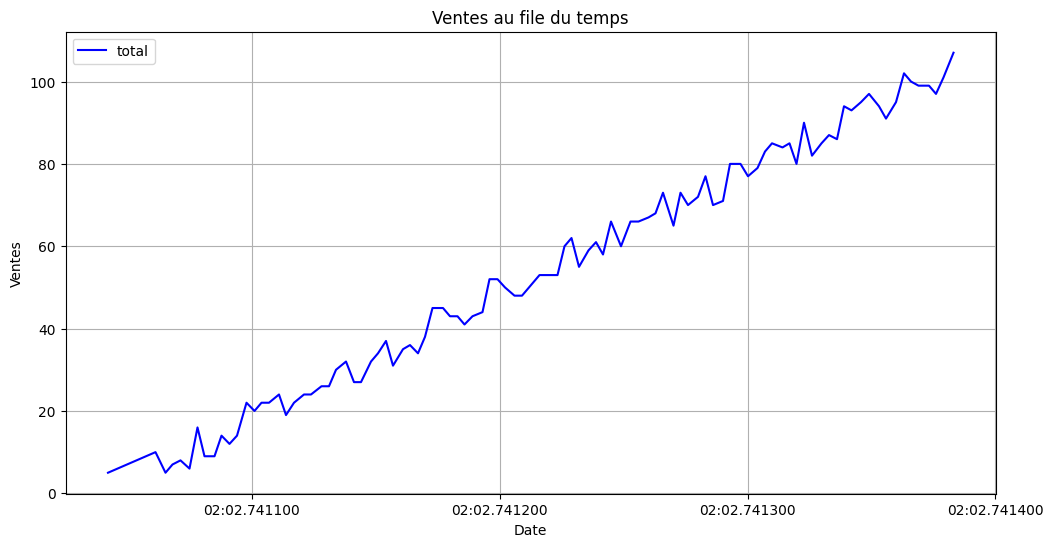

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["total"], label="total", color="blue")
plt.title("Ventes au file du temps")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.grid()
mplcursors.cursor(hover=True)
plt.legend()
plt.show()

- Histogramme des ventes, visualiser la distribution des ventes.

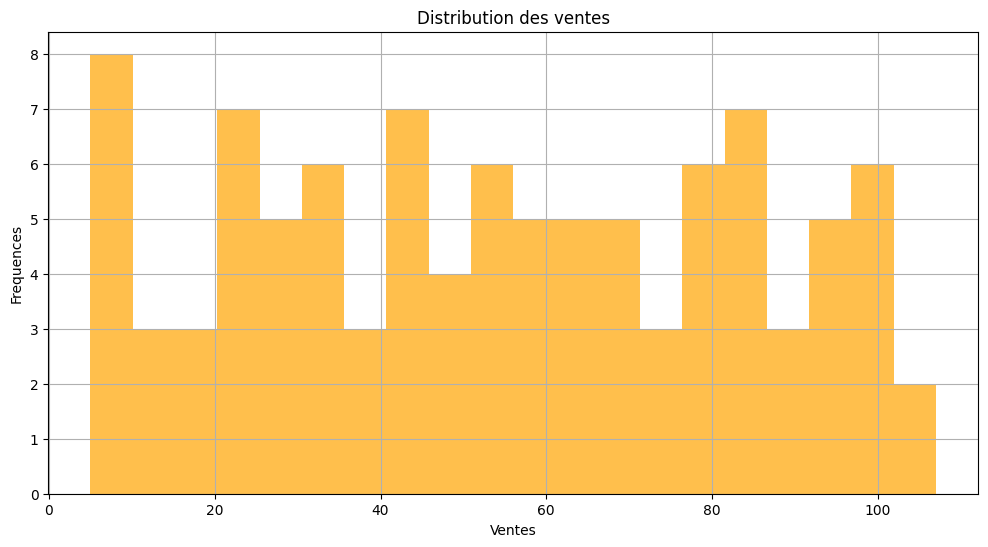

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(data['total'], bins=20, color='orange', alpha=0.7)
plt.title("Distribution des ventes")
plt.xlabel("Ventes")
plt.ylabel("Frequences")
plt.grid()
plt.show()

## Étape 5, intégration avec un tableau de bord interactif.

Pour rendre le tableau de bord interactif, vous pouvez utiliser `Dash` ou `Streamlit`. Ces bibliothèques permettent de créer facilement des interfaces utilisateurs pour vos visualisations :

In [7]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

### Exemple d'interface `Dash`.

In [10]:
app = dash.Dash(__name__)
app.layout = html.Div([
        dcc.Graph(id="graph"),
        dcc.Dropdown(options=[{"label": "Ventes", "value": "total"}], value="total", id="dropdown")
    ]
)

@app.callback(Output("graph", "figure"), Input("dropdown", "value"))
def update_graph(selected_value):
    fig = go.Figure(data=[go.Scatter(x=data.index, y=data[selected_value])])
    return fig

if __name__ == '__main__':
    app.run_server(
        host='0.0.0.0',
        port=8889,
        debug=True
    )

## Conclusion

Dans ce cas avancé, nous avons créé un tableau de bord interactif en utilisant `pandas` et `matplotlib`, et nous avons introduit le concept de l'utilisation de bibliothèques comme `dash` pour créer des interfaces interactives. Cela vous permet non seulement de visualiser vos données, mais aussi de les explorer de manière dynamique, ce qui est essentiel lors de l'analyse de données.